
<div style=" padding: 10px; font-size: 45px; text-align: center;">
<strong>  Tiamat üßå: </strong> 
<div style=" padding: 10px; font-size: 36px; text-align: center;">
<strong> An√°lise dos dados & Cria candidato üë§</strong> 

<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Autores:</strong> Glauber Nascimento de Oliveira, J√∫lia Guedes A. dos Santos & Lorena Ribeiro Nascimento
<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Professor:</strong> Daniel R. Cassar

<div style="background-color: lightblue; font-size: 18px; padding: 10px;">
<div style="text-align: justify"><strong>Objetivo:</strong> An√°lise do Dataset para Criar Candidato </div>
 

## üìà**Introdu√ß√£o**

<p align="justify">
O presente notebook faz parte de um conjunto de atividades referentes a implementa√ß√£o de um algoritmo gen√©tico para a descoberta de propriedades que levem a um aumento da dureza de um material. Nesse notebook, ser√° feita uma an√°lise descritiva dos dados a fim de compreender, principalmente, a distribui√ß√£o das colunas do dataset. Isso ser√° importante, principalmente, para a composi√ß√£o da fun√ß√£o ``cria_candidato_feature``, a qual criar√° o candidato composto pelas <em>features</em> do dataset original. Para que os limites f√≠sicos possam ser respeitados, a an√°lise buscar√° compreender o range de cada <em>feature</em> a fim de que, na fun√ß√£o criada, os valores sorteados estejam dentro do intervalo das colunas originais. 
</p>

<p align="justify">
Al√©m disso, para que que os valores de m√≠nimo possam ser mais fidedignos aos dados do dataset, outliers - isto √©, linhas que apresentam apenas valor n√£o nulo na coluna referente ao <em>target</em> - ser√£o removidos antes da defini√ß√£o do intervalo. Esses intervalos ser√£o armazenados por um dicion√°rio, o qual ser√° salvo pelo m√≥dulo Pickle e importado no notebook "5.2 - Implementa√ß√£o_AG".
</p>

## üìö**Importa√ß√£o de bibliotecas & Dataset**


Em primeiro lugar, precisamos importar as bibliotecas necess√°rias para a resolu√ß√£o do problema, assim como o dataset mencionado na introdu√ß√£o ("Mineral_Dataset_Supplementary_Info.csv"). Para evitar a presen√ßa de dados faltantes, o dropna ser√° executado, assim como a exclus√£o da coluna referente aos ind√≠ces do dados.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import random

import pickle

In [17]:
minerais = pd.read_csv("Mineral_Dataset_Supplementary_Info.csv").dropna()

In [18]:
minerais = pd.read_csv("Mineral_Dataset_Supplementary_Info.csv", usecols=lambda col: minerais.columns.get_loc(col) >= 1)
minerais

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0         2.3               110.0      23.000000             36.666667   
1         5.5               406.0      30.472136              9.902439   
2         5.5               406.0      30.472464             10.410256   
3         5.5               476.0      61.142136             11.609756   
4         5.5               476.0      61.142464             12.205128   
..        ...                 ...            ...                   ...   
617       3.8                46.0       9.133000             23.000000   
618       4.5                86.0       6.674328             14.333333   
619       4.0                38.0       7.134332             19.000000   
620       7.5                86.0       8.841328             14.333333   
621       6.0               226.0      18.204400             10.272727   

     val_e_Average  atomicweight_Average  ionenergy_Average  \
0         2.666667             82.598467           8.504133   
1         4.682927             19.813180          11.456151   
2         4.923077             20.931371          11.541405   
3         4.682927             23.659644          11.487395   
4         4.923077             24.975089          11.574251   
..             ...                   ...                ...   
617       4.000000             48.719500           9.877100   
618       5.166667             30.645954          11.862733   
619       4.000000             40.689515          11.506150   
620       5.000000             30.550687          11.543000   
621       4.727273             20.652175          11.148755   

     el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0              2.146667               2.006667               1.253333   
1              2.700244               1.676829               0.868293   
2              2.753590               1.703846               0.894359   
3              2.763659               1.714634               0.848780   
4              2.820256               1.743590               0.873846   
..                  ...                    ...                    ...   
617            2.115000               1.905000               1.120000   
618            2.861667               1.700000               0.901667   
619            2.545000               1.765000               0.920000   
620            2.831667               1.735000               0.890000   
621            2.702273               1.695455               0.875455   

     zaratio_Average  density_Average  
0           0.456803         7.666667  
1           0.522909         0.743223  
2           0.497498         0.781345  
3           0.519474         1.491272  
4           0.493887         1.567755  
..               ...              ...  
617         0.478880         4.566500  
618         0.487172         1.112388  
619         0.479405         3.567166  
620         0.489507         1.473555  
621         0.519605         0.827473  

[622 rows x 12 columns]

## üî¢ **An√°lise descritiva** 

A partir da ferramenta ``describe`` do m√≥dulo Numpy, √© poss√≠vel obter algumas estat√≠sticas descritivas dos dados. 

In [19]:
minerais.describe()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
count  622.000000          622.000000     622.000000            622.000000   
mean     4.613987          312.895691      27.864836             14.808027   
std      1.729636          853.331650      39.243940              9.963898   
min      1.000000            0.000000       0.000000              0.000000   
25%      3.000000           98.250000      10.561656              9.371995   
50%      5.500000          186.500000      20.744196             10.852814   
75%      5.950000          390.000000      34.824490             17.416667   
max     10.000000        15300.000000     643.093804             67.000000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count     622.000000            622.000000         622.000000   
mean        4.419379             32.243577          11.108756   
std         0.807960             24.586056           1.748614   
min         0.000000              0.000000           0.000000   
25%         4.058333             18.833820          10.961967   
50%         4.636364             22.197615          11.359643   
75%         4.800000             38.852958          11.804828   
max         6.000000            167.400000          14.163933   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
count          622.000000             622.000000             622.000000   
mean             2.626550               1.670637               0.875162   
std              0.402856               0.256487               0.197932   
min              0.000000               0.000000               0.000000   
25%              2.629196               1.612857               0.796770   
50%              2.708831               1.713333               0.887321   
75%              2.774951               1.763561               0.949722   
max              3.426381               2.250000               1.500000   

       zaratio_Average  density_Average  
count       622.000000       622.000000  
mean          0.514876         1.925111  
std           0.095138         1.944419  
min           0.000000         0.000000  
25%           0.482455         0.738097  
50%           0.496546         1.032304  
75%           0.538921         2.337138  
max           0.770755        10.970000

<p align="justify">
De forma geral, √© poss√≠vel analisar de forma quantitativa cada coluna, sendo que, em primeira an√°lise, √© percept√≠vel que praticamente todas as colunas que n√£o s√£o o <em>target</em> possuem como m√≠nimo 0, o que n√£o necessariamente faz sentido f√≠sico. Isso pode ser um indicativo de que as colunas possuem <em>outliers</em> ou dados faltantes (que foram preenchidos com 0 ao inv√©s de NaN ou outra estrutura tradicionalmente utilizada para indicar a presen√ßa de dados faltantes). Ademais, foi poss√≠vel notar que os dados possuem intervalos bem distintos, partindo desde a casa dos d√©cimos, como em "zratio_Average", at√© a casa dos milhares, como em "allelectrons_Total". A partir disso, √© v√°lido concluir que, em casos de modelos sens√≠veis a escala, como no caso do k-NN que ser√° treinado para a fun√ß√£o objetivo ("5.2 - Treinamento do modelo & Fun√ß√£o objetivo"), os dados precisar√£o ser normalizados. Al√©m disso, √© necess√°rio utilizar os operadores gen√©ticos com cautela, evitando a troca de dados entre colunas, para que a cria√ß√£o de indiv√≠duos inv√°lidos possa ser evitada.
</p>

## üìä **Plotando gr√°ficos & Identificando dados faltantes**

A fim de compreender melhor os padr√µes presentes na base de dados, √© poss√≠vel plotar gr√°ficos, como histogramas e gr√°ficos de caixa (<em>boxplots</em>) para cada coluna do dataset.

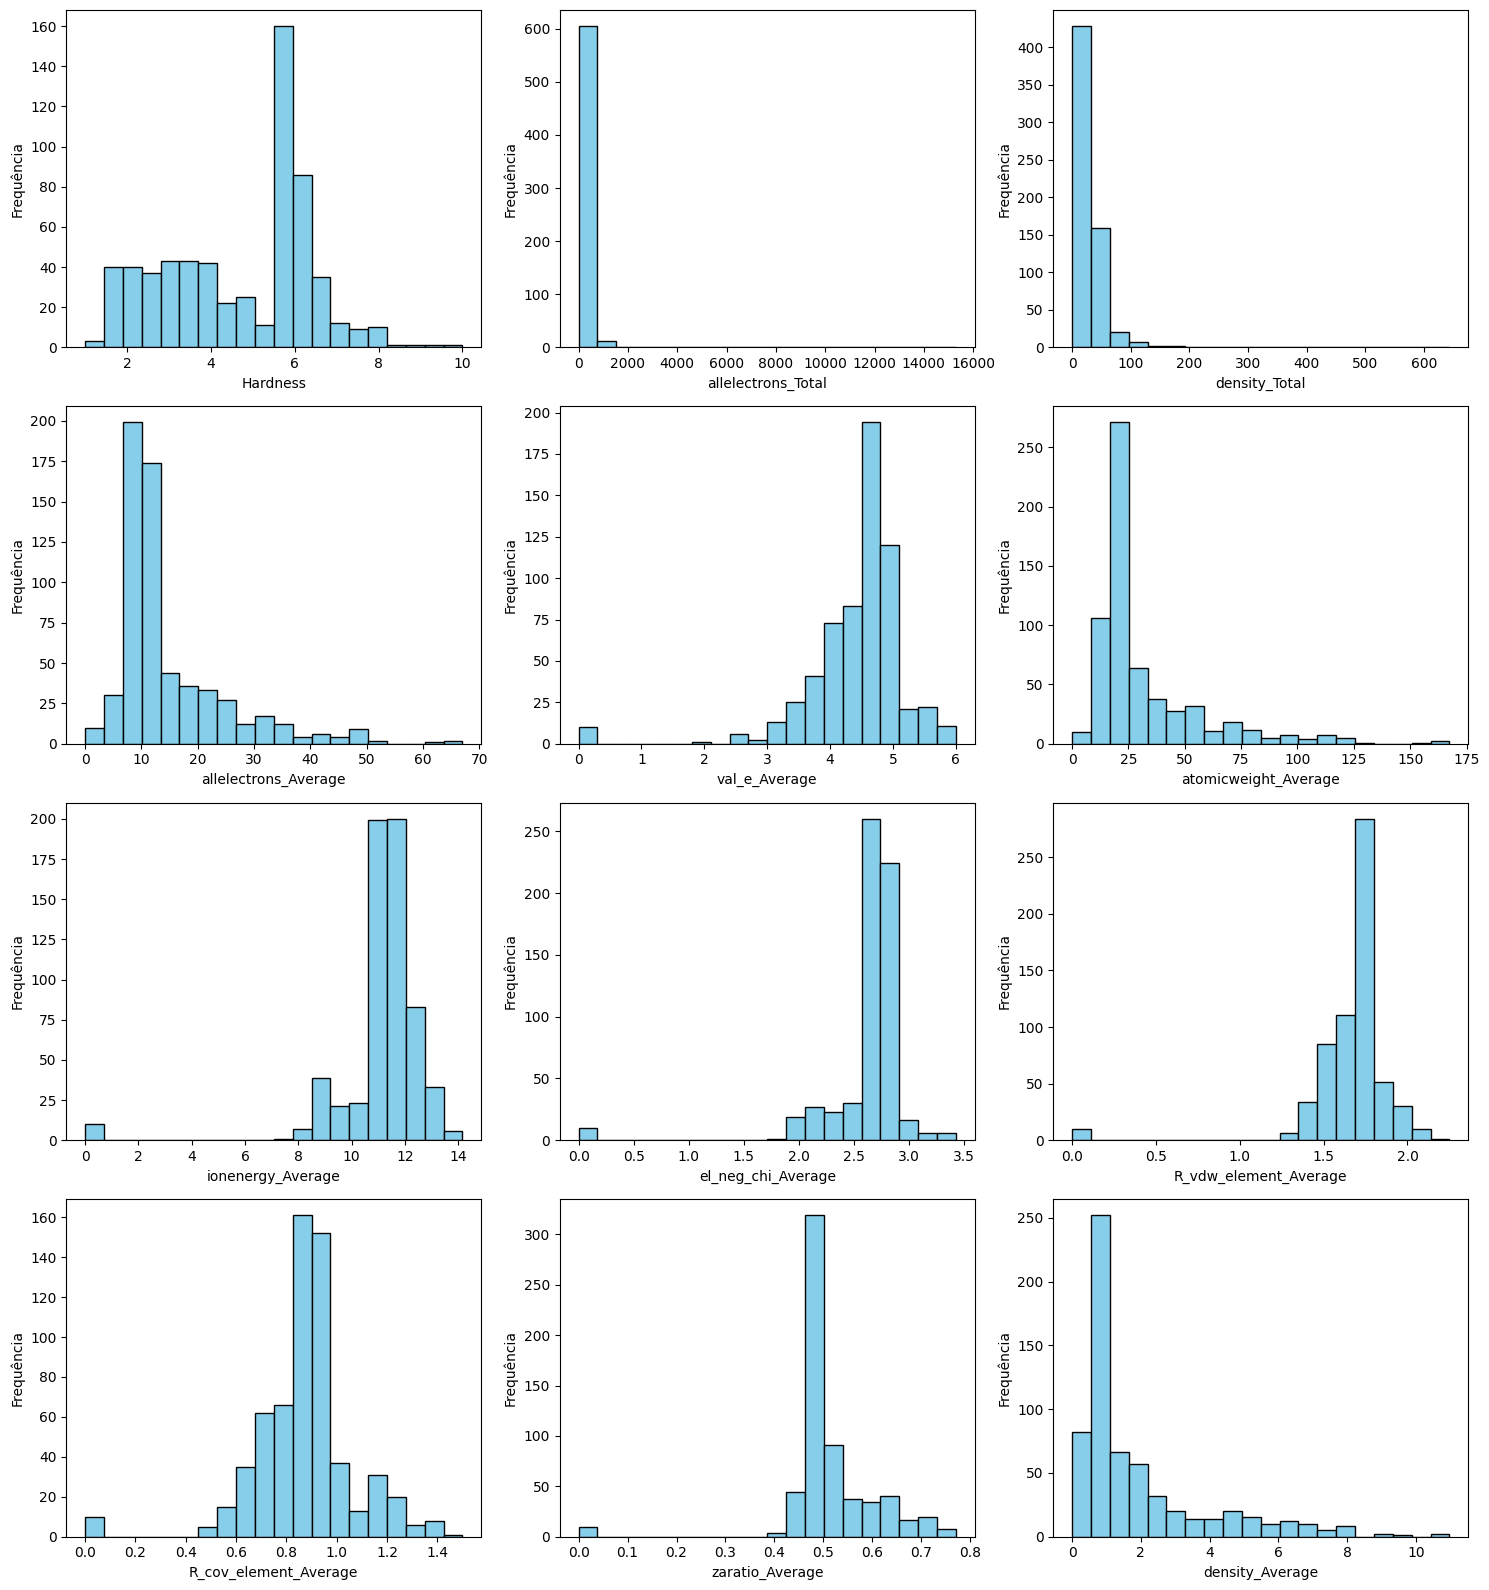

In [20]:
colunas = minerais.columns
num_colunas = len(colunas)

n_cols = 3  #numero de imagens por linha
n_rows = math.ceil(num_colunas / n_cols)    # quantidade de linhas


figura, eixos = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
eixos = eixos.flatten()  # Transforma a grade em uma lista simples de eixos


for i, coluna in enumerate(colunas):
    eixos[i].hist(minerais[coluna], bins=20, color='skyblue', edgecolor='black')
    eixos[i].set_xlabel(coluna)
    eixos[i].set_ylabel("Frequ√™ncia")

plt.tight_layout()
plt.savefig("histogramas_minerais.png", dpi=300)  # dpi opcional, melhora a resolu√ß√£o
plt.show()

√â poss√≠vel notar que os gr√°ficos possuem distribui√ß√µes e intervalos (como demonstrado pela an√°lise feita a partir das estat√≠sticas descritivas) bem distintos. Colunas como "allelectrons_total" possuem praticamente todas as inst√¢ncias em um mesmo intervalo, enquanto outras, como "R_cov_element_Average", possuem seus dados (apesar de contidos em um intervalo pequeno) melhor distribu√≠dos.

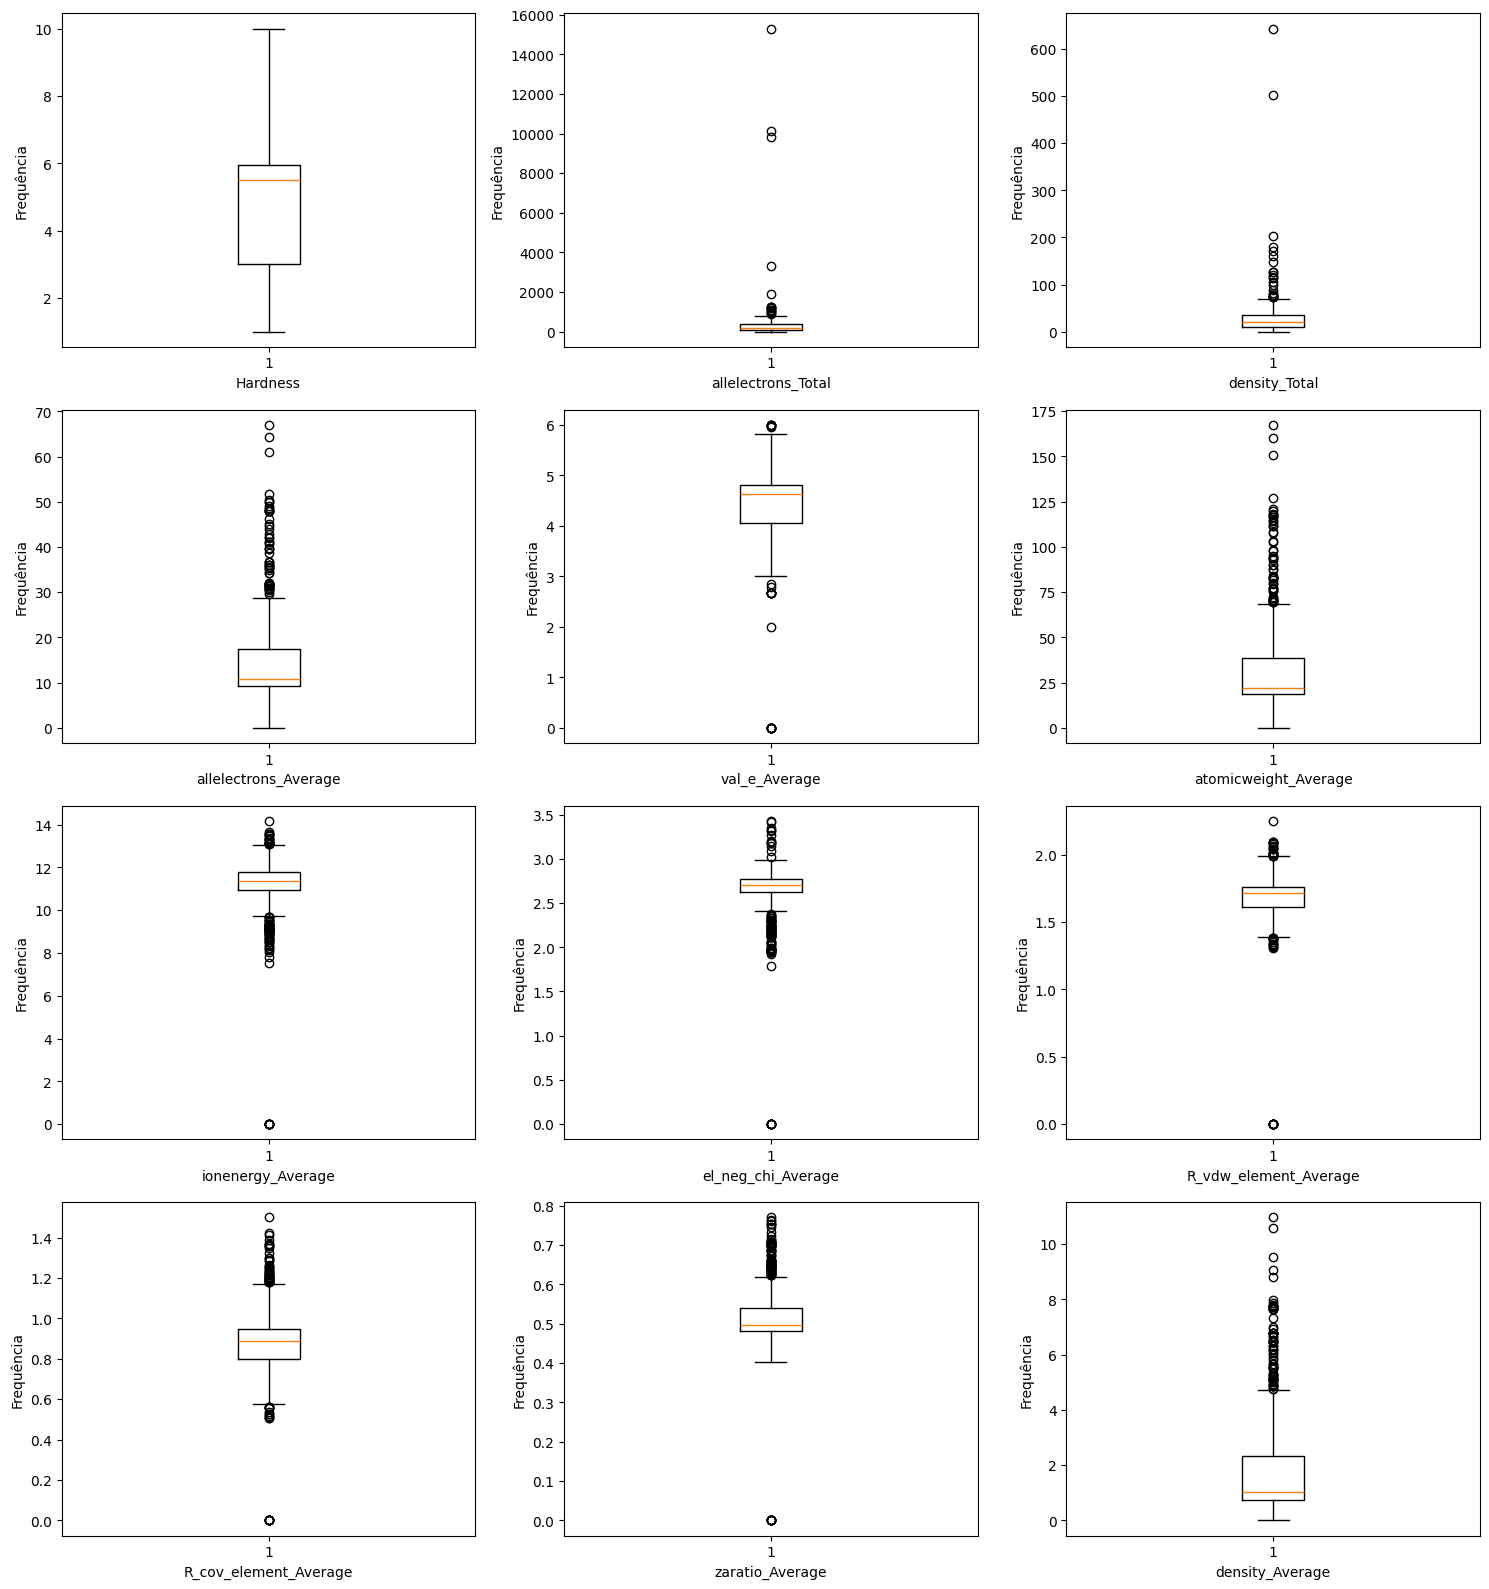

In [21]:
colunas = minerais.columns
num_colunas = len(colunas)

n_cols = 3  #numero de imagens por linha
n_rows = math.ceil(num_colunas / n_cols)    # quantidade de linhas


figura, eixos = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
eixos = eixos.flatten()  # Transforma a grade em uma lista simples de eixos


for i, coluna in enumerate(colunas):
    eixos[i].boxplot(x= minerais[coluna])
    eixos[i].set_xlabel(coluna)
    eixos[i].set_ylabel("Frequ√™ncia")

plt.tight_layout()
plt.savefig("histogramas_minerais.png", dpi=300)  # dpi opcional, melhora a resolu√ß√£o
plt.show()

Em rela√ß√£o aos gr√°ficos de caixa, √© poss√≠vel notar a presen√ßa de outliers, tanto nos limites inferiores quanto superiores. Nesse sentido, os dados equivalentes a 0 parecem mais preocupantes, dado que, pelo contexto, √© poss√≠vel inferir que s√£o dados faltantes. Para embasar essa hip√≥tese, √© poss√≠vel verificar quais ind√≠ces correspondem aos dados iguais a 0 em cada coluna, que se configuram como outliers.

In [22]:
indices_zeros = minerais.index[minerais["val_e_Average"] == 0].tolist()
print(indices_zeros)
print(len(indices_zeros))
 
indices_zeros2 = minerais.index[minerais["allelectrons_Average"] == 0].tolist()
print(indices_zeros2)
print(len(indices_zeros2))
 
indices_zeros3 = minerais.index[minerais["allelectrons_Total"] == 0].tolist()
print(indices_zeros3)
print(len(indices_zeros3))
 
indices_zeros4 = minerais.index[minerais["ionenergy_Average"] == 0].tolist()
print(indices_zeros4)
print(len(indices_zeros4))
 
indices_zeros5 = minerais.index[minerais["atomicweight_Average"] == 0].tolist()
print(indices_zeros5)
print(len(indices_zeros5))
 
indices_zeros6 = minerais.index[minerais["el_neg_chi_Average"] == 0].tolist()
print(indices_zeros6)
print(len(indices_zeros6))

[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10


Como √© poss√≠vel notar, os dados encontram-se nas mesmas inst√¢ncias, o que comprova a hip√≥tese de que esses se configuram como dados faltantes. Para que esses n√£o sejam respons√°veis por distorcer o intervalo dos atributos, ser√£o retirados por meio do m√©todo ``drop``.

In [23]:
minerais = minerais.drop(index=[150, 156, 317, 387, 388, 389, 390, 391, 392, 552])
minerais.head(151)

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0         2.3               110.0      23.000000             36.666667   
1         5.5               406.0      30.472136              9.902439   
2         5.5               406.0      30.472464             10.410256   
3         5.5               476.0      61.142136             11.609756   
4         5.5               476.0      61.142464             12.205128   
..        ...                 ...            ...                   ...   
146       2.5               552.0      42.521292              7.666667   
147       2.5               564.0      54.029292              7.833333   
148       2.5               720.0     116.129292             10.000000   
149       6.5               222.0      23.348983              8.880000   
151       5.5               106.0      22.239328             15.142857   

     val_e_Average  atomicweight_Average  ionenergy_Average  \
0         2.666667             82.598467           8.504133   
1         4.682927             19.813180          11.456151   
2         4.923077             20.931371          11.541405   
3         4.682927             23.659644          11.487395   
4         4.923077             24.975089          11.574251   
..             ...                   ...                ...   
146       3.888889             15.272095          11.770372   
147       4.055556             15.718351          11.493639   
148       3.888889             20.528928          11.813072   
149       4.400000             17.918277          11.727840   
151       4.000000             31.976189          10.843971   

     el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0              2.146667               2.006667               1.253333   
1              2.700244               1.676829               0.868293   
2              2.753590               1.703846               0.894359   
3              2.763659               1.714634               0.848780   
4              2.820256               1.743590               0.873846   
..                  ...                    ...                    ...   
146            2.606111               1.497222               0.762222   
147            2.656111               1.515556               0.735556   
148            2.692778               1.548889               0.735556   
149            2.761200               1.571200               0.748800   
151            2.701429               1.748571               0.914286   

     zaratio_Average  density_Average  
0           0.456803         7.666667  
1           0.522909         0.743223  
2           0.497498         0.781345  
3           0.519474         1.491272  
4           0.493887         1.567755  
..               ...              ...  
146         0.606304         0.590573  
147         0.604317         0.750407  
148         0.601609         1.612907  
149         0.574341         0.933959  
151         0.484111         3.177047  

[151 rows x 12 columns]

## üéº **Definindo intervalos**

A partir da retirada dos dados faltantes, √© poss√≠vel definir os intervalos de cada *feature*, utilizando como base os valores de m√≠nimo e m√°ximo desses atributos.

In [24]:
for coluna in minerais:
    minimo = np.min(minerais[coluna])
    maximo = np.max(minerais[coluna])
    print()
    print(f"O valor m√°ximo e m√≠nimo da coluna {coluna} √© {minimo} e {maximo}, respectivamente")


O valor m√°ximo e m√≠nimo da coluna Hardness √© 1.3 e 10.0, respectivamente

O valor m√°ximo e m√≠nimo da coluna allelectrons_Total √© 6.0 e 15300.0, respectivamente

O valor m√°ximo e m√≠nimo da coluna density_Total √© 0.8649950000000001 e 643.0938035, respectivamente

O valor m√°ximo e m√≠nimo da coluna allelectrons_Average √© 4.482758620689656 e 67.0, respectivamente

O valor m√°ximo e m√≠nimo da coluna val_e_Average √© 2.0 e 6.0, respectivamente

O valor m√°ximo e m√≠nimo da coluna atomicweight_Average √© 8.462066620620691 e 167.39999999999995, respectivamente

O valor m√°ximo e m√≠nimo da coluna ionenergy_Average √© 7.532971428571429 e 14.163933333333333, respectivamente

O valor m√°ximo e m√≠nimo da coluna el_neg_chi_Average √© 1.79 e 3.4263805668016185, respectivamente

O valor m√°ximo e m√≠nimo da coluna R_vdw_element_Average √© 1.3062068965517242 e 2.25, respectivamente

O valor m√°ximo e m√≠nimo da coluna R_cov_element_Average √© 0.5053333333333333 e 1.5, respectivamente

O 

Para que o espa√ßo de busca possa ser ampliado, esses valores ser√£o arredondados para um "teto" (ou seja, arredondados para cima) a partir de uma base 5. Ou seja, os valores de m√°ximo ser√£o arredondados para cima para um valor m√∫ltiplo de 5.

In [25]:
base = 5
dicionario = {}
for coluna in minerais:
    minimo = np.min(minerais[coluna])
    maximo = np.max(minerais[coluna])
    
    rounded_min = round(minimo)
    rounded_max = base * np.ceil(maximo / base)
    
    dicionario[coluna] = [rounded_min, rounded_max]
print()
print(dicionario)


{'Hardness': [1, 10.0], 'allelectrons_Total': [6, 15300.0], 'density_Total': [1, 645.0], 'allelectrons_Average': [4, 70.0], 'val_e_Average': [2, 10.0], 'atomicweight_Average': [8, 170.0], 'ionenergy_Average': [8, 15.0], 'el_neg_chi_Average': [2, 5.0], 'R_vdw_element_Average': [1, 5.0], 'R_cov_element_Average': [1, 5.0], 'zaratio_Average': [0, 5.0], 'density_Average': [0, 15.0]}


Com o dicion√°rio definido, √© poss√≠vel salv√°-lo em um arquivo .pkl para que esse possa ser importado no arquivo de implementa√ß√£o do algoritmo gen√©tico ("5.2 - Implementa√ß√£o_AG"). 

In [26]:
with open("dicionario_intervalos.pkl", "wb") as arquivo:
    pickle.dump(dicionario, arquivo)

## üë§ **Fun√ß√£o Cria candidato** 

A partir dos intervalos definidos √© poss√≠vel implementar a fun√ß√£o ``gene_feat``, a qual consiste no sorteio de um n√∫mero contido dentro de um intervalo definido por um argumento. Esse, valor representar√° o gene de um candidato, ou seja, um dos atributos daquele indiv√≠duo. No contexto do problema analisado, esses valores ser√£o obtidos a partir do dicion√°rio com os intervalos definidos. Para generaliza√ß√£o dessa fun√ß√£o para a cria√ß√£o de um candidato completo, a fun√ß√£o ``cria_candidato_feature`` ser√° utilizada, a qual recebe uma lista de listas, sendo que cada uma representa o intervalo de um atributo distinto. Finalmente, para a cria√ß√£o da popula√ß√£o, a fun√ß√£o ``funcao_objetivo_pop_feature`` ser√° definida no script. 


In [ ]:
def gene_feat(intervalo):
    """Sorteia um valor para a feature dentro do intervalo permitido com valor m√≠nimo e m√°ximo"""
    valores_possiveis = range(int(intervalo[0]), int(intervalo[1]))
    gene = random.choice(valores_possiveis)
    return gene

def cria_candidato_feature(intervalos):
    """Cria uma lista com n valores entre o intervalo.

    Args:
      n: inteiro que representa o n√∫mero de caixas.
      intervalo: lista com o valor m√≠nimo e m√°ximo das features
    """

    candidato = []
    for intervalo in intervalos:
        gene = gene_feat(intervalo)
        candidato.append(gene)
    return candidato



Para testar, podemos utilizar como base  os valores da primeira chave do dicion√°rio definido anteriormente (coluna "Hardness")

In [28]:
valores = list(dicionario.values())[0]
valores

[1, 10.0]

Sorteando um √∫nico gene, temos que esse assumiu o valor 1. 

In [29]:
gene_feat(intervalo=list(dicionario.values())[0])

1

De forma geral, utilizando os valores armazenados no dicion√°rio, √© poss√≠vel utilizar a fun√ß√£o ``cria_candidato_feature`` para criar um candidato aleat√≥rio.

In [30]:
cria_candidato_feature(intervalos = list(dicionario.values()))

[4, 13768, 283, 32, 6, 161, 12, 2, 2, 3, 4, 0]

## üòÅ **Conclus√£o**

<p align="justify">
A partir desse notebook, foi poss√≠vel realizar uma an√°lise descritiva dos dados que ser√£o utilizados como base para o treinamento do modelo (arquivo "5.2 - Treinamento do modelo & Fun√ß√£o Objetivo) para a composi√ß√£o da fun√ß√£o objetivo do notebook central ("5.2 - Implementa√ß√£o_AG"). A partir da retirada de dados faltantes, foi poss√≠vel definir um dicion√°rio que cont√©m os intervalos das <em>features</em> utilizadas, sendo que o intervalo m√°ximo foi arredondado a partir de uma base 5.  Esse, por sua vez, foi utilizado para a cria√ß√£o da fun√ß√£o respons√°vel por criar a popula√ß√£o que ir√° compor a primeira gera√ß√£o do algoritmo gen√©tico que ser√° implementado. 
</p>